<a href="https://colab.research.google.com/github/SeptiLutfiana/MESIN-LEARNING/blob/main/Pertemuan_11_Tugas_Septi_Lutfiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Septi Lutfiana
- 2141720038
- 3H

**Pertemuan 11 - Praktikum 2**

1. Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%

170498071/170498071 [==============================] - 4s 0us/step


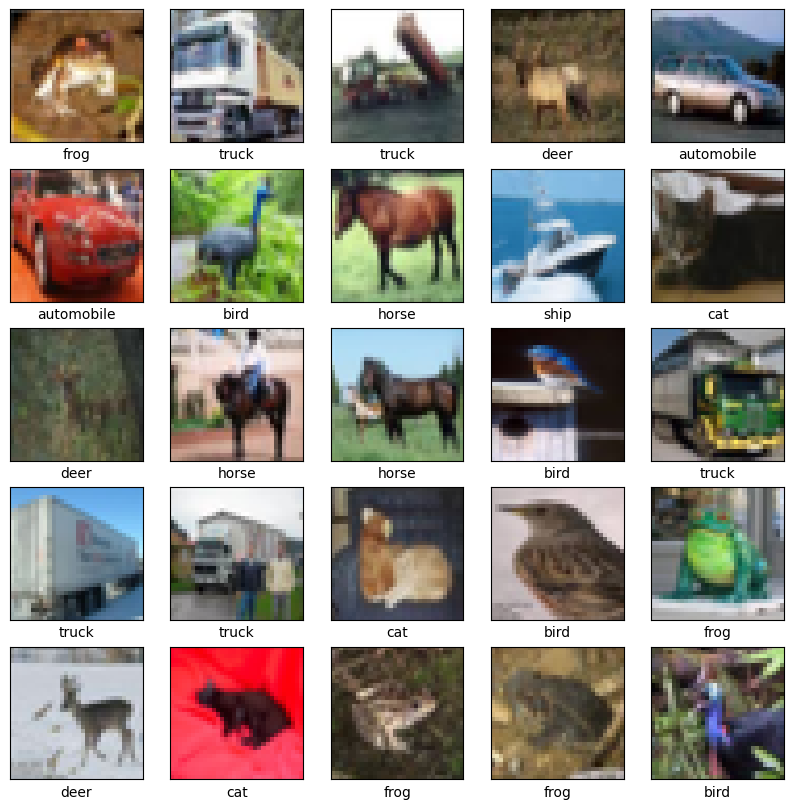

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

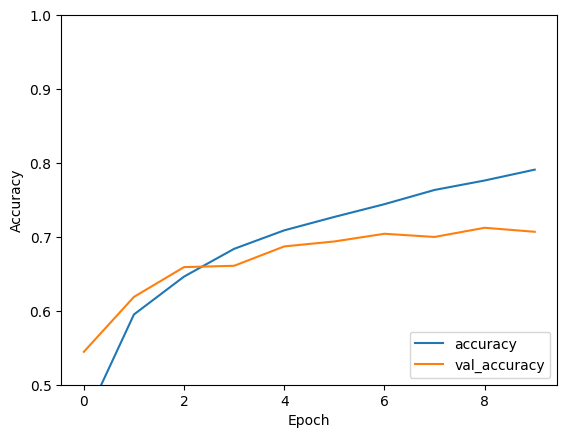

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  # The CIFAR labels happen to be arrays,
  # which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)


print(test_acc)


170498071/170498071 [==============================] - 3s 0us/step
Epoch 1/10
1563/1563 [==============================] - 49s 22ms/step - loss: 1.6794 - accuracy: 0.1091 - val_loss: 1.3489 - val_accuracy: 0.0489
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.3993 - accuracy: 0.0980 - val_loss: 1.2256 - val_accuracy: 0.0870
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.2974 - accuracy: 0.0987 - val_loss: 1.1258 - val_accuracy: 0.0991
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.2351 - accuracy: 0.0969 - val_loss: 1.0565 - val_accuracy: 0.0921
Epoch 5/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1819 - accuracy: 0.0984 - val_loss: 1.0457 - val_accuracy: 0.0802
Epoch 6/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1428 - accuracy: 0.0982 - val_loss: 1.0390 - val_accuracy: 0.1182
Epoch 7/10
1563/1563 [==============================] - 3

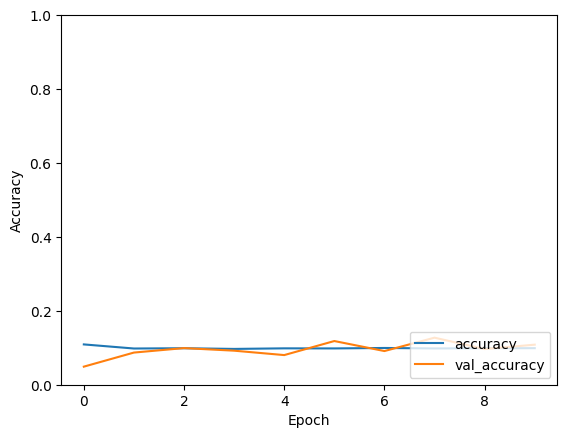

Epoch 1/10
1563/1563 [==============================] - 36s 22ms/step - loss: 1.6796 - accuracy: 0.1118 - val_loss: 1.4276 - val_accuracy: 0.0693
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.3857 - accuracy: 0.0995 - val_loss: 1.1550 - val_accuracy: 0.1083
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.2799 - accuracy: 0.0950 - val_loss: 1.1006 - val_accuracy: 0.1017
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.2057 - accuracy: 0.0950 - val_loss: 1.1619 - val_accuracy: 0.0798
Epoch 5/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1582 - accuracy: 0.0960 - val_loss: 1.0098 - val_accuracy: 0.1219
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1189 - accuracy: 0.0975 - val_loss: 0.9654 - val_accuracy: 0.0812
Epoch 7/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0873 - accuracy: 0.0990 - val_loss: 0.9641 -

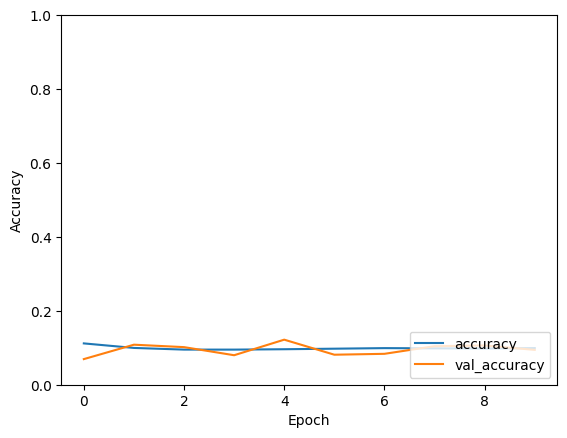

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )

datagen.fit(train_images)

# Model definition
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  # Dropout layer added
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Model compilation
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Model training with data augmentation
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=10,
                    validation_data=(test_images, test_labels))

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy:", test_acc)


Epoch 1/50
782/782 [==============================] - 35s 41ms/step - loss: 1.7265 - accuracy: 0.1116 - val_loss: 1.3771 - val_accuracy: 0.0761
Epoch 2/50
782/782 [==============================] - 35s 44ms/step - loss: 1.3401 - accuracy: 0.0958 - val_loss: 1.1696 - val_accuracy: 0.0933
Epoch 3/50
782/782 [==============================] - 32s 40ms/step - loss: 1.1528 - accuracy: 0.0987 - val_loss: 0.9487 - val_accuracy: 0.1222
Epoch 4/50
782/782 [==============================] - 35s 44ms/step - loss: 1.0371 - accuracy: 0.0997 - val_loss: 0.8611 - val_accuracy: 0.0960
Epoch 5/50
782/782 [==============================] - 31s 40ms/step - loss: 0.9517 - accuracy: 0.1009 - val_loss: 0.8412 - val_accuracy: 0.0800
Epoch 6/50
782/782 [==============================] - 32s 41ms/step - loss: 0.8955 - accuracy: 0.1002 - val_loss: 0.8081 - val_accuracy: 0.1000
Epoch 7/50
782/782 [==============================] - 31s 40ms/step - loss: 0.8565 - accuracy: 0.1003 - val_loss: 0.8314 - val_accuracy:

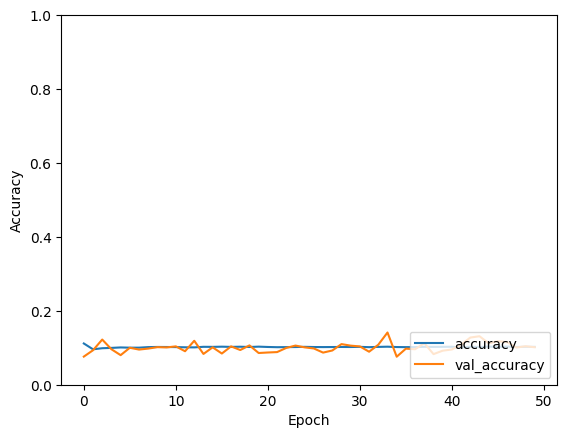

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

datagen.fit(train_images)

# Model definition
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

# Model compilation
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Model training with data augmentation
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=50,
                    validation_data=(test_images, test_labels))

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy:", test_acc)


2. Buatlah model CNN untuk klasifikasi dataset MNIST.

In [7]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Add a channel dimension (for grayscale images)
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

# Model definition
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Model compilation
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Model training
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy:", test_acc)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1462 - accuracy: 0.9547 - val_loss: 0.0506 - val_accuracy: 0.9827
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0473 - accuracy: 0.9852 - val_loss: 0.0394 - val_accuracy: 0.9873
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0340 - accuracy: 0.9892 - val_loss: 0.0340 - val_accuracy: 0.9881
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0245 - accuracy: 0.9924 - val_loss: 0.0344 - val_accuracy: 0.9889
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0190 - accuracy: 0.9938 - val_loss: 0.0311 - val_accuracy: 0.9906
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.0307 - val_accuracy: 0.9912
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step -